In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [113]:
data=pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [114]:
data.shape

(301, 9)

In [115]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [117]:
data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [118]:
data['Fuel_Type'].replace({'Petrol':0,'Diesel':1,'CNG':2},inplace=True)
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [119]:
data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [120]:
data['Seller_Type'].replace({'Dealer':0,'Individual':1},inplace=True)
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0


In [121]:
data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [122]:
data['Transmission'].replace({'Manual':0,'Automatic':1},inplace=True)
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [123]:
##check missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [124]:
data['Car_Name'] = data['Car_Name'].apply(lambda x: x.replace(' ','_'))
data['Car_Name'] = data['Car_Name'].apply(lambda x: x.lower())

In [125]:
data['Car_Name'][80:100]

80    corolla_altis
81         etios_gd
82           innova
83           innova
84           innova
85            camry
86     land_cruiser
87    corolla_altis
88       etios_liva
89          etios_g
90    corolla_altis
91           innova
92           innova
93         fortuner
94    corolla_altis
95    corolla_altis
96           innova
97    corolla_altis
98    corolla_altis
99         fortuner
Name: Car_Name, dtype: object

In [126]:
data['num_years'] = data['Year'].apply(lambda x: 2020-x)
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,num_years
0,ritz,2014,3.35,5.59,27000,0,0,0,0,6
1,sx4,2013,4.75,9.54,43000,1,0,0,0,7
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,3
3,wagon_r,2011,2.85,4.15,5200,0,0,0,0,9
4,swift,2014,4.60,6.87,42450,1,0,0,0,6


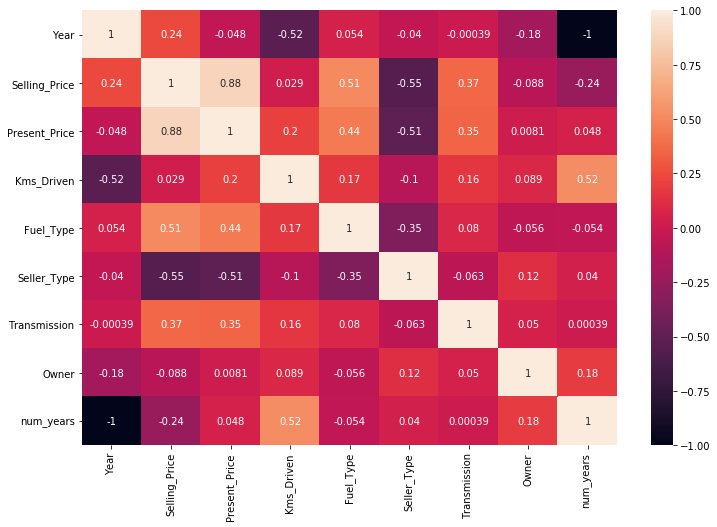

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

In [128]:
y = data['Selling_Price'].values.reshape(-1,1)
X = data.drop(['Selling_Price','Year'],axis=1)
X.head()

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,num_years
0,ritz,5.59,27000,0,0,0,0,6
1,sx4,9.54,43000,1,0,0,0,7
2,ciaz,9.85,6900,0,0,0,0,3
3,wagon_r,4.15,5200,0,0,0,0,9
4,swift,6.87,42450,1,0,0,0,6


In [129]:
X.shape,y.shape

((301, 8), (301, 1))

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(240, 8) (240, 1)
(61, 8) (61, 1)


In [131]:
X_train.head()

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,num_years
74,etios_cross,8.93,83000,1,0,0,0,6
239,eon,4.43,23709,0,0,0,0,8
64,fortuner,36.23,6000,1,0,1,0,3
294,amaze,6.80,33019,0,0,0,0,6
286,jazz,7.90,28569,0,0,0,0,4


In [132]:
X_test.head()

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,num_years
223,verna,9.400,61381,1,0,0,0,5
150,tvs_apache_rtr_180,0.826,6000,0,1,0,0,9
226,grand_i10,5.700,24678,0,0,0,0,5
296,city,11.600,33988,1,0,0,0,4
52,innova,19.770,15000,1,0,1,0,3


In [133]:
len(X_train['Car_Name'].unique())

90

In [134]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['Car_Name'].values)

X_train_car_name = vectorizer.transform(X_train['Car_Name'])
X_test_car_name = vectorizer.transform(X_test['Car_Name'])


print(X_train_car_name.shape,X_test_car_name.shape)

(240, 90) (61, 90)


In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train['Kms_Driven'].values.reshape(-1, 1))

X_train_Kms_Driven=scaler.transform(X_train['Kms_Driven'].values.reshape(-1, 1))
X_test_Kms_Driven=scaler.transform(X_test['Kms_Driven'].values.reshape(-1, 1))

print(X_train_Kms_Driven.shape,X_test_Kms_Driven.shape)

(240, 1) (61, 1)


In [136]:
X_train_Kms_Driven[:10],X_test_Kms_Driven[:10]

(array([[ 1.05706025],
        [-0.3529268 ],
        [-0.77406088],
        [-0.13152761],
        [-0.23735214],
        [ 0.51190933],
        [ 0.55766358],
        [-0.88583061],
        [ 0.1058285 ],
        [-0.32222579]]),
 array([[ 0.54294327],
        [-0.77406088],
        [-0.32988321],
        [-0.10848402],
        [-0.56003373],
        [-0.78357319],
        [-0.08441785],
        [-0.89296485],
        [-0.15576024],
        [-0.05825898]]))

In [137]:
X_train.drop(['Car_Name','Kms_Driven'],axis=1,inplace=True)
X_test.drop(['Car_Name','Kms_Driven'],axis=1,inplace=True)

In [138]:
columns = list(X_train.columns.values)
columns.extend(vectorizer.get_feature_names())
columns.extend(["Kms_Driven"])

In [139]:
columns

['Present_Price',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner',
 'num_years',
 '800',
 'activa_3g',
 'activa_4g',
 'alto_800',
 'alto_k10',
 'amaze',
 'bajaj__ct_100',
 'bajaj_avenger_150',
 'bajaj_avenger_150_street',
 'bajaj_avenger_220',
 'bajaj_avenger_220_dtsi',
 'bajaj_avenger_street_220',
 'bajaj_discover_100',
 'bajaj_discover_125',
 'bajaj_dominar_400',
 'bajaj_pulsar_135_ls',
 'bajaj_pulsar_150',
 'bajaj_pulsar_220_f',
 'bajaj_pulsar_ns_200',
 'bajaj_pulsar_rs200',
 'baleno',
 'brio',
 'camry',
 'ciaz',
 'city',
 'corolla',
 'corolla_altis',
 'creta',
 'dzire',
 'elantra',
 'eon',
 'ertiga',
 'etios_cross',
 'etios_g',
 'etios_liva',
 'fortuner',
 'grand_i10',
 'hero__cbz_xtreme',
 'hero__ignitor_disc',
 'hero_extreme',
 'hero_glamour',
 'hero_honda_passion_pro',
 'hero_hunk',
 'hero_passion_pro',
 'hero_passion_x_pro',
 'hero_splender_ismart',
 'hero_splender_plus',
 'hero_super_splendor',
 'honda_activa_125',
 'honda_activa_4g',
 'honda_cb_hornet_160r',
 'honda_c

In [140]:
from scipy.sparse import hstack
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

X_tr = hstack((X_train, X_train_car_name, X_train_Kms_Driven)).tocsr()
X_te = hstack((X_test, X_test_car_name, X_test_Kms_Driven)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(240, 97) (240, 1)
(61, 97) (61, 1)


In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [142]:
lr = LinearRegression()
lr.fit(X_tr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
predicted = lr.predict(X_te)

In [144]:
mean_squared_error(y_test,predicted)

1.2348649397430442

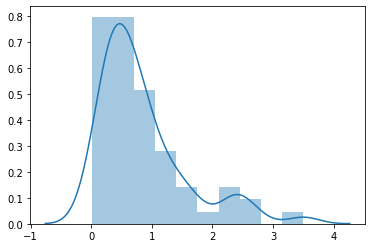

In [145]:
sns.distplot(abs(y_test-predicted))

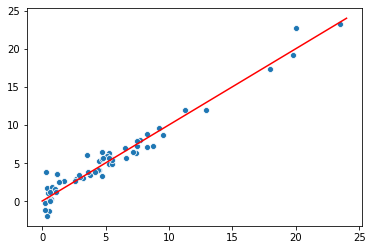

In [146]:
line = [i for i in range(int(max(y_test)+2))]

sns.scatterplot(y_test.reshape(-1),predicted.reshape(-1))
plt.plot(line,color = 'r')
plt.show()

In [147]:
alphas = {'alpha': [5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0 ]}

In [148]:
ls = Lasso()
RS_CV = RandomizedSearchCV(estimator = ls, param_distributions = alphas,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
RS_CV.fit(X_tr, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.0s
[CV] alpha=5 .........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................................... alpha=0.0001, total=   0.1s
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.1s
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.0s
[CV] alpha=0 .........................................................
[CV] .......................................... alpha=0, total=   0.1s
[CV] alpha=0 .........................................................
[CV] .......................................... alpha=0, total=   0.1s
[CV] alpha=0 .........................................................
[CV] .......................................... alpha=0, total=   0.1s
[CV] alpha=0 .........................................................
[CV] .......................................... alpha=0, total=   0.1s
[CV] alpha=0 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'alpha': [5, 0.5, 0.05, 0.005, 0.0005,
                                                  1, 0.1, 0.01, 0.001, 0.0001,
                                                  0]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

In [149]:
lasso_model = RS_CV.best_estimator_
predicted = lasso_model.predict(X_te)

In [150]:
mean_squared_error(y_test,predicted)

3.3332706945534243

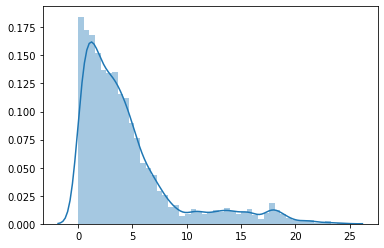

In [151]:
sns.distplot(abs(y_test-predicted))

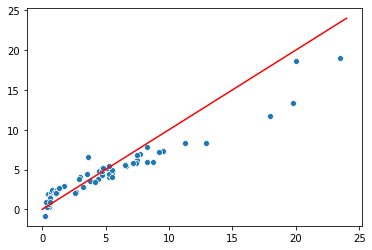

In [152]:
sns.scatterplot(y_test.reshape(-1),predicted.reshape(-1))
plt.plot(line,color = 'r')
plt.show()

In [153]:
rd = Ridge()

RS_CV = RandomizedSearchCV(estimator = rd, param_distributions = alphas,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
RS_CV.fit(X_tr, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.0s
[CV] alpha=5 .........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................................... alpha=0.05, total=   0.0s
[CV] alpha=0.5 .......................................................
[CV] ........................................ alpha=0.5, total=   0.0s
[CV] alpha=0.5 .......................................................
[CV] ........................................ alpha=0.5, total=   0.0s
[CV] alpha=0.5 .......................................................
[CV] ........................................ alpha=0.5, total=   0.0s
[CV] alpha=0.5 .......................................................
[CV] ........................................ alpha=0.5, total=   0.0s
[CV] alpha=0.5 .......................................................
[CV] ........................................ alpha=0.5, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'alpha': [5, 0.5, 0.05, 0.005, 0.0005,
                                                  1, 0.1, 0.01, 0.001, 0.0001,
                                                  0]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

In [154]:
ridge_model = RS_CV.best_estimator_
predicted = ridge_model.predict(X_te)

In [155]:
mean_squared_error(y_test,predicted)

1.5284196777157044

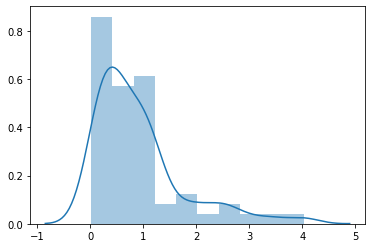

In [156]:
sns.distplot(abs(y_test-predicted))

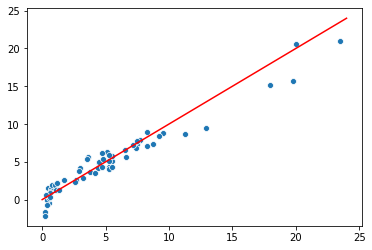

In [157]:
sns.scatterplot(y_test.reshape(-1),predicted.reshape(-1))
plt.plot(line,color = 'r')
plt.show()

In [158]:
knnR = KNeighborsRegressor()

params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

RS_CV = RandomizedSearchCV(estimator = knnR, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
RS_CV.fit(X_tr, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] weights=distance, n_neighbors=15, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric=euclidean ...............
[CV]  weigh

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] weights=distance, n_neighbors=11, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=11, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=11, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=11, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=11, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=11, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=13, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=13, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=13, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=13, metric=euclidean, total=   0.0

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

In [159]:
KNN_reg_model = RS_CV.best_estimator_
predicted = KNN_reg_model.predict(X_te)

In [160]:
mean_squared_error(y_test,predicted)

1.1520370852916368

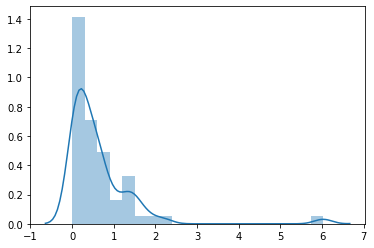

In [161]:
sns.distplot(abs(y_test-predicted))

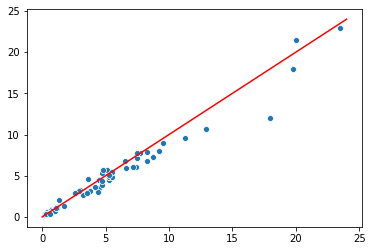

In [162]:
sns.scatterplot(y_test.reshape(-1),predicted.reshape(-1))
plt.plot(line,color = 'r')
plt.show()

In [163]:
dtr = DecisionTreeRegressor()

In [164]:
params={"max_depth" : [1,3,5,7,9,11,12],
        "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
        "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

RS_CV = RandomizedSearchCV(estimator = dtr, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
RS_CV.fit(X_tr, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_leaf=9, max_leaf_nodes=50, max_depth=3 ..............
[CV]  min_samples_leaf=9, max_leaf_nodes=50, max_depth=3, total=   0.0s
[CV] min_samples_leaf=9, max_leaf_nodes=50, max_depth=3 ..............
[CV]  min_samples_leaf=9, max_leaf_nodes=50, max_depth=3, total=   0.0s
[CV] min_samples_leaf=9, max_leaf_nodes=50, max_depth=3 ..............
[CV]  min_samples_leaf=9, max_leaf_nodes=50, max_depth=3, total=   0.0s
[CV] min_samples_leaf=9, max_leaf_nodes=50, max_depth=3 ..............
[CV]  min_samples_leaf=9, max_leaf_nodes=50, max_depth=3, total=   0.0s
[CV] min_samples_leaf=9, max_leaf_nodes=50, max_depth=3 ..............
[CV]  min_samples_leaf=9, max_leaf_nodes=50, max_depth=3, total=   0.0s
[CV] min_samples_leaf=1, max_leaf_nodes=None, max_depth=11 ...........
[CV]  min_samples_leaf=1, max_leaf_nodes=None, max_depth=11, total=   0.0s
[CV] min_samples_leaf=1, max_leaf_nodes=None, max_depth=11 ...........
[CV]  m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  min_samples_leaf=10, max_leaf_nodes=80, max_depth=5, total=   0.0s
[CV] min_samples_leaf=10, max_leaf_nodes=80, max_depth=5 .............
[CV]  min_samples_leaf=10, max_leaf_nodes=80, max_depth=5, total=   0.0s
[CV] min_samples_leaf=10, max_leaf_nodes=80, max_depth=5 .............
[CV]  min_samples_leaf=10, max_leaf_nodes=80, max_depth=5, total=   0.0s
[CV] min_samples_leaf=10, max_leaf_nodes=80, max_depth=5 .............
[CV]  min_samples_leaf=10, max_leaf_nodes=80, max_depth=5, total=   0.0s
[CV] min_samples_leaf=10, max_leaf_nodes=80, max_depth=5 .............
[CV]  min_samples_leaf=10, max_leaf_nodes=80, max_depth=5, total=   0.0s
[CV] min_samples_leaf=1, max_leaf_nodes=None, max_depth=7 ............
[CV]  min_samples_leaf=1, max_leaf_nodes=None, max_depth=7, total=   0.0s
[CV] min_samples_leaf=1, max_leaf_nodes=None, max_depth=7 ............
[CV]  min_samples_leaf=1, max_leaf_nodes=None, max_depth=7, total=   0.0s
[CV] min_samples_leaf=1, max_leaf_nodes=None, max_depth=7 ...

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [165]:
decision_tree_r_model = RS_CV.best_estimator_
predicted = decision_tree_r_model.predict(X_te)

In [166]:
mean_squared_error(y_test,predicted)

2.515361480927437

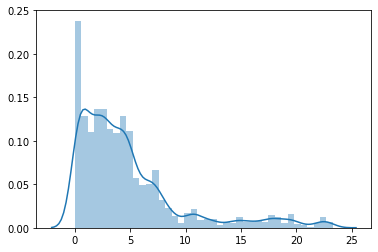

In [167]:
sns.distplot(abs(y_test-predicted))

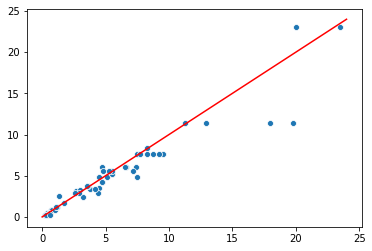

In [168]:
sns.scatterplot(y_test.reshape(-1),predicted.reshape(-1))
plt.plot(line,color = 'r')
plt.show()

In [169]:
rf = RandomForestRegressor()

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# max_depth depth of tree to predict
max_depth = [i for i in range(5,31,5)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

params = {
    'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf
}

RS_CV = RandomizedSearchCV(estimator = rf, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
RS_CV.fit(X_tr, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.2s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.4s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.4s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.3s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.3s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.3s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max

[CV]  min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.3s
[CV] min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   15.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [80]:
RandomForest_r_model = RS_CV.best_estimator_
predicted = RandomForest_r_model.predict(X_te)

In [81]:
mean_squared_error(y_test,predicted)

1.3991214037984099

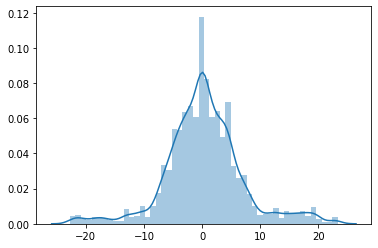

In [82]:
sns.distplot(abs(y_test-predicted))

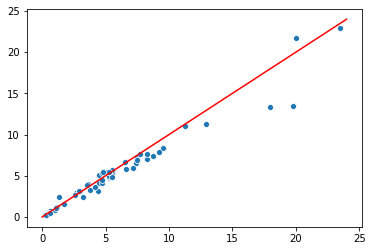

In [83]:
sns.scatterplot(y_test.reshape(-1),predicted)
plt.plot(line,color = 'r')
plt.show()

In [84]:
etr = ExtraTreesRegressor()

params={"max_depth" : [1,3,5,7,9,11,12],
        "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
        "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}

RS_CV = RandomizedSearchCV(estimator = etr, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
RS_CV.fit(X_tr, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_leaf=9, max_leaf_nodes=50, max_depth=3 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_leaf=9, max_leaf_nodes=50, max_depth=3, total=   0.2s
[CV] min_samples_leaf=9, max_leaf_nodes=50, max_depth=3 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  min_samples_leaf=9, max_leaf_nodes=50, max_depth=3, total=   0.3s
[CV] min_samples_leaf=9, max_leaf_nodes=50, max_depth=3 ..............
[CV]  min_samples_leaf=9, max_leaf_nodes=50, max_depth=3, total=   0.2s
[CV] min_samples_leaf=9, max_leaf_nodes=50, max_depth=3 ..............
[CV]  min_samples_leaf=9, max_leaf_nodes=50, max_depth=3, total=   0.2s
[CV] min_samples_leaf=9, max_leaf_nodes=50, max_depth=3 ..............
[CV]  min_samples_leaf=9, max_leaf_nodes=50, max_depth=3, total=   0.2s
[CV] min_samples_leaf=1, max_leaf_nodes=None, max_depth=11 ...........
[CV]  min_samples_leaf=1, max_leaf_nodes=None, max_depth=11, total=   0.4s
[CV] min_samples_leaf=1, max_leaf_nodes=None, max_depth=11 ...........
[CV]  min_samples_leaf=1, max_leaf_nodes=None, max_depth=11, total=   0.4s
[CV] min_samples_leaf=1, max_leaf_nodes=None, max_depth=11 ...........
[CV]  min_samples_leaf=1, max_leaf_nodes=None, max_depth=11, total=   0.4s
[CV] min_samples_leaf=1, max_leaf_nodes=None, max_depth=11 ..

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   14.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                         

In [85]:
RS_CV.best_estimator_

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=11, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [87]:
ExtraTrees_model = RS_CV.best_estimator_
predicted = ExtraTrees_model.predict(X_te)

In [88]:
mean_squared_error(y_test,predicted)

0.4888691552113585

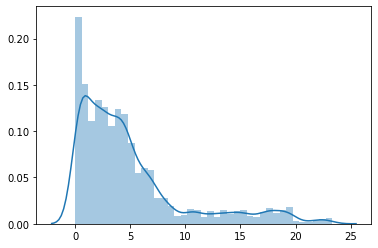

In [89]:
sns.distplot(abs(y_test-predicted))

In [90]:
sorted(y_test.reshape(-1)-predicted,reverse=True)[int(len(y_test)*0.25):int(len(y_test)*0.75)]

[0.5858286214360273,
 0.5404410065924736,
 0.47653159059793193,
 0.4594012209280436,
 0.44165330799702396,
 0.43117580687830603,
 0.4079674735449723,
 0.39982358021607833,
 0.20023541666666667,
 0.19922664825557057,
 0.18778705136747442,
 0.17320880602240774,
 0.16909945152097894,
 0.16826475363716398,
 0.15283323670149151,
 0.08435579039424654,
 0.08192081749065938,
 0.07635337392577035,
 0.06879555220769268,
 0.059499999999996334,
 0.05689180076409883,
 0.048785700912282515,
 0.04461055229900843,
 0.03217772873909658,
 0.017910864073646726,
 0.013677902816750187,
 0.010693994702193343,
 0.009270466378549391,
 0.008874834085963679,
 -4.221811101157158e-06]

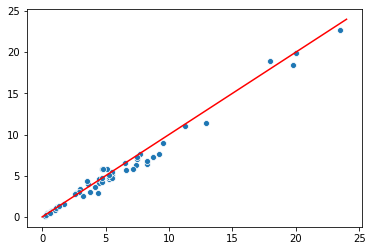

In [91]:
sns.scatterplot(y_test.reshape(-1),predicted)
plt.plot(line,color = 'r')
plt.show()

In [92]:
print(ExtraTrees_model.feature_importances_)

[5.69409904e-02 3.75511559e-01 4.12112175e-02 2.16653085e-01
 1.44372484e-02 8.68357283e-05 5.85613660e-02 3.49025005e-05
 8.98768833e-08 1.55155292e-07 7.56994446e-06 2.56338089e-04
 1.19405668e-04 3.48104717e-06 2.53048811e-06 4.08234835e-08
 6.06510944e-06 9.16408606e-07 1.67625036e-07 9.77817611e-09
 6.02430903e-08 8.08608858e-06 2.26738858e-07 3.55904369e-06
 1.85119420e-06 1.78613605e-06 8.58955184e-06 1.29258995e-05
 2.99032577e-04 1.13454272e-04 1.07077492e-03 6.67939470e-03
 4.21406505e-04 1.55129272e-02 4.29625711e-04 1.83811427e-05
 1.05096494e-03 2.84777960e-04 3.59356374e-04 2.52492813e-04
 1.44407740e-05 8.31774259e-06 1.11966808e-01 1.35722621e-04
 1.04584923e-06 1.05334516e-06 2.10397935e-07 1.84651696e-07
 3.78961340e-07 2.56165269e-08 1.39817911e-07 2.54552081e-07
 8.99653920e-08 9.15570130e-07 2.68572094e-08 5.01820305e-07
 7.28558377e-10 2.08005115e-06 5.68430457e-07 1.09230870e-06
 1.73886691e-07 1.00767292e-06 1.20287651e-05 0.00000000e+00
 3.64224418e-06 7.910647

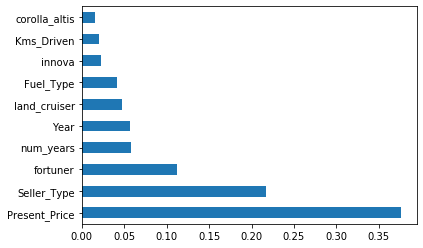

In [111]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(ExtraTrees_model.feature_importances_, index=columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [170]:
import pickle
# open a file, where you ant to store the data
file = open('ExtraTrees_model.pkl', 'wb')

# dump information to that file
pickle.dump(ExtraTrees_model, file)
file.close()

In [178]:
scaler.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [185]:
scaler.transform(np.array(50000).reshape(1, -1))

array([[0.27229405]])

In [187]:
file = open('scaler.pkl', 'wb')

# dump information to that file
pickle.dump(scaler, file)
file.close()

In [188]:
file = open('vectorizer.pkl', 'wb')

# dump information to that file
pickle.dump(vectorizer, file)
file.close()